In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
ec50_ds = pd.read_csv('datasets/aids_ec50_may04.txt')
ic50_ds = pd.read_csv('datasets/aids_ic50_may04.txt')
result_ds = pd.read_csv('datasets/reference.csv')

In [4]:
ec_result = result_ds.join(ec50_ds.set_index('NSC'), on='NSC')
ec_result = ec_result.dropna()
print(len(ec_result))
ec_result.head()

39024


,NSC,Conclusion,Log10HiConc,ConcUnit,Flag,Log10EC50,NumExp,StdDev
0,48,CI,-3.7,M,>,-3.70,3.0,0.0
1,78,CI,-3.7,M,>,-3.70,3.0,0.0
2,128,CI,-3.7,M,>,-3.70,4.0,0.0
4,164,CI,-3.7,M,>,-3.70,2.0,0.0
5,170,CI,-3.0,M,>,-3.02,1.0,0.0


In [5]:
ic_result = result_ds.join(ic50_ds.set_index('NSC'), on='NSC')
ic_result = ic_result.dropna()
print(len(ic_result))
ic_result.head()

39010


,NSC,Conclusion,Log10HiConc,ConcUnit,Flag,Log10IC50,NumExp,StdDev
0,48,CI,-3.7,M,=,-4.61,3.0,0.02
1,78,CI,-3.7,M,=,-4.02,3.0,0.09
2,128,CI,-3.7,M,=,-4.34,4.0,0.06
4,164,CI,-3.7,M,>,-3.70,2.0,0.00
6,180,CI,-2.7,M,=,-3.16,2.0,0.07


## Inspect IC50 and EC50 correlation with conclusion

In [25]:
ec_result.groupby('Conclusion')[['Log10HiConc', 'Log10EC50']].describe()

Log10HiConc                                              Log10EC50  \
                 count      mean       std  min  25%  50%  75%  max     count   
Conclusion                                                                      
CA               802.0 -3.310848  2.405148 -7.0 -4.6 -3.7 -3.7  3.2     802.0   
CI             36817.0 -3.859856  0.784846 -9.7 -4.0 -3.7 -3.7  5.6   36817.0   
CM              1405.0 -3.565338  1.017903 -7.0 -3.7 -3.7 -3.6  3.0    1405.0   

                                                                    
                mean       std    min     25%    50%     75%   max  
Conclusion                                                          
CA         -5.045549  2.448019 -10.15 -6.6075 -5.535 -4.6225  1.65  
CI         -3.874754  0.796813  -9.70 -4.0000 -3.700 -3.7000  5.60  
CM         -4.129900  1.120181  -8.28 -4.6300 -4.150 -3.8000  2.16

Text(0.5, 0, 'Compound concentration (Log10EC50)')

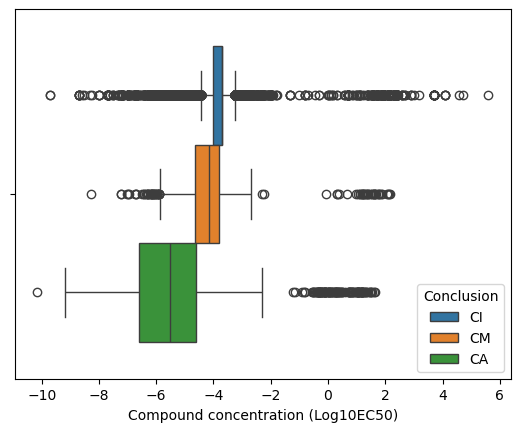

In [27]:
ax = sns.boxplot(ec_result, x='Log10EC50', hue='Conclusion')
ax.set_xlabel('Compound concentration (Log10EC50)')

In [26]:
ic_result.groupby('Conclusion')[['Log10HiConc', 'Log10IC50']].describe()

Log10HiConc                                                 \
                 count      mean       std  min    25%  50%  75%  max   
Conclusion                                                              
CA               868.0 -3.329608  2.346380 -7.0 -4.525 -3.7 -3.7  3.2   
CI             36735.0 -3.860090  0.784538 -9.7 -4.000 -3.7 -3.7  5.6   
CM              1407.0 -3.552310  1.055289 -7.0 -3.700 -3.7 -3.6  3.2   

           Log10IC50                                                     
               count      mean       std    min   25%    50%  75%   max  
Conclusion                                                               
CA             868.0 -3.629574  2.285965  -7.00 -4.85 -4.235 -3.7  2.94  
CI           36735.0 -4.349950  1.056683 -11.00 -4.83 -4.110 -3.7  5.64  
CM            1407.0 -3.881144  1.127476  -8.41 -4.30 -3.820 -3.7  2.49

<Axes: xlabel='Log10IC50'>

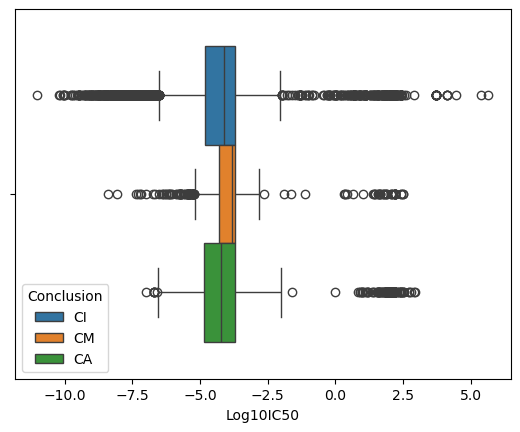

In [20]:
sns.boxplot(ic_result, x='Log10IC50', hue='Conclusion')